# Dubin's car obstacle avoidance

In [1]:
import sys; sys.path.append('../src')
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

## Dynamics

In [2]:
from dynamics import *

# car length # [m]
l = 1

# instantiate dynamics
sys = Dynamics(l)

## Environment

In [3]:
from environment import Environment

# area length and height
lx, ly = 50, 30

# safety distance
d = l

# instantiate environment
env = Environment(lx, ly, d)

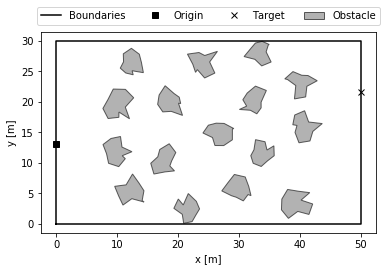

In [4]:
fig, ax = env.plot()
fig.savefig('env.svg', bbox_inches='tight')

### Test obstacle detection

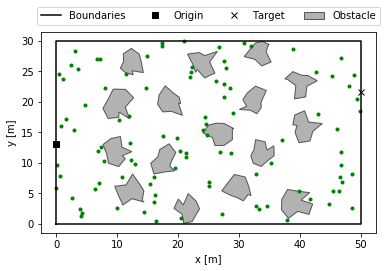

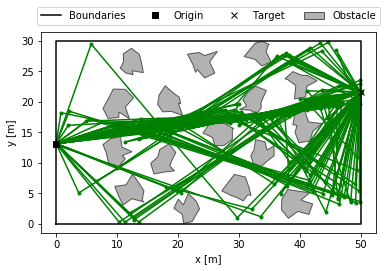

In [5]:
# with points
fig, ax = plt.subplots(1)
i = 0
while i < 100:
    x = np.random.uniform(0, env.lx)
    y = np.random.uniform(0, env.ly)
    p = np.array([x, y])
    if env.safe(p):
        ax.plot(*p, 'g.')
        i += 1
    else:
        continue
env.plot(ax)

# lines
fig, ax = plt.subplots(1)
i = 0
while i < 100:
    x = np.random.uniform(0, env.lx, (2, 1))
    y = np.random.uniform(0, env.ly, (2, 1))
    p = np.hstack((x, y))
    p = np.vstack((env.p0, p, env.pf))
    if env.safe(p):
        ax.plot(p[:,0], p[:,1], 'g.-')
        i += 1
    else:
        continue
env.plot(ax)
plt.show()    

## Mission

In [6]:
from mission import Mission

# instantiate mission
mis = Mission(Dynamics(1), env)

In [7]:
# simulate mission with random control
while mis.safe:
    u = np.random.uniform(-.5, 0.1)
    s, t, safe = mis.step(u)

Using matplotlib backend: Qt5Agg


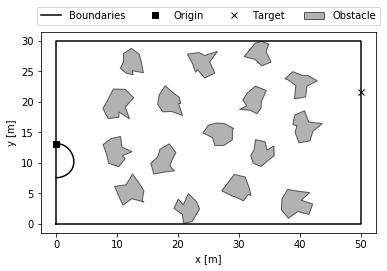

In [8]:
%matplotlib
fig, ax = plt.subplots(1)

ax.plot(mis.states[:, 0], mis.states[:,1], 'k-')
env.plot(ax)

plt.show()

In [ ]:
fig, ax = plt.subplots(mis.dynamics.sdim, sharex=True)

for si in range(mis.dynamics.sdim):
    
    ax[si].plot(mis.times, mis.states[:, si], 'k-')
    
plt.show()

In [ ]:
a = env.obs[0].verts[:, 0]  > 25
a

In [ ]:
any(a)